In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Import iris data 
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


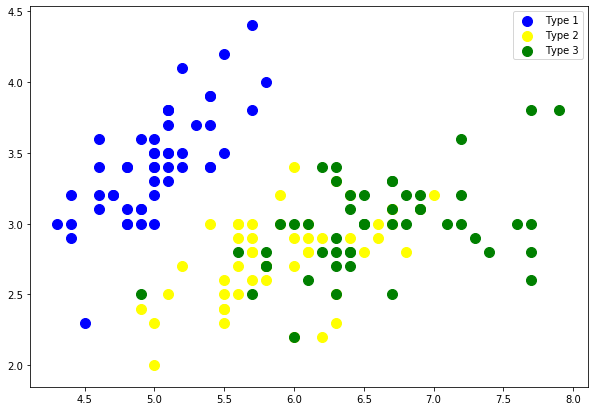

In [2]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_Y = iris_data.iloc[:,4].values

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s=100, c='blue', label='Type 1')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s=100, c='green', label='Type 3')
plt.legend()
plt.show()

Text(0, 0.5, 'Euclidean distance')

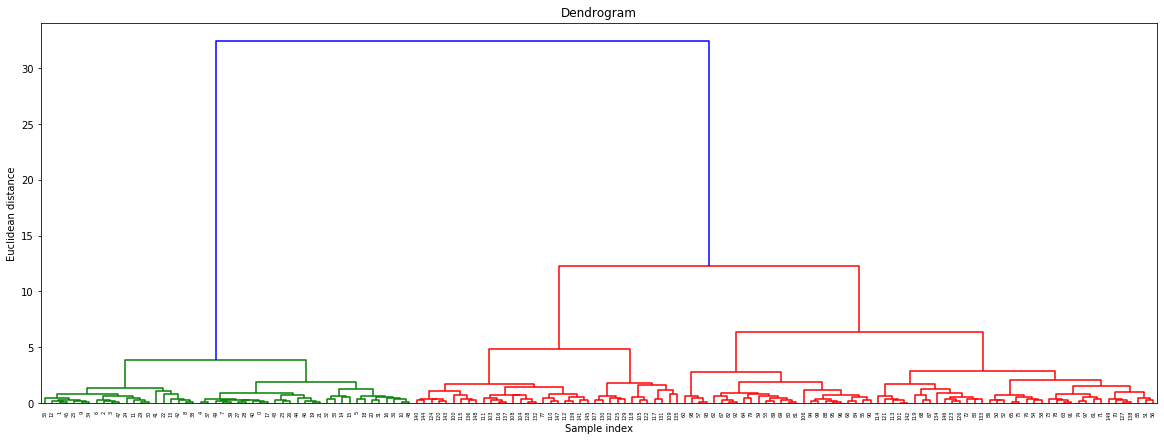

In [4]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(iris_X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(iris_X)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

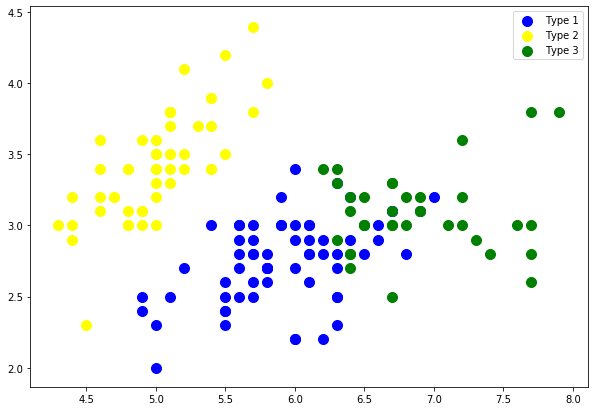

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()

In [9]:
import numpy as np;
import pandas as pd
num_clusters = 0
mat = np.array([[0,2,6,10,9],[2,0,5,9,8],[6,5,0,4,5],[10,9,4,0,3],[9,8,5,3,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)


def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['c', 'd', 'e'], ['a', 'b']]
3 [['a', 'b'], ['d', 'e'], ['c']]
4 [['a', 'b'], ['c'], ['e'], ['d']]
5 [['c'], ['e'], ['d'], ['b'], ['a']]


In [10]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

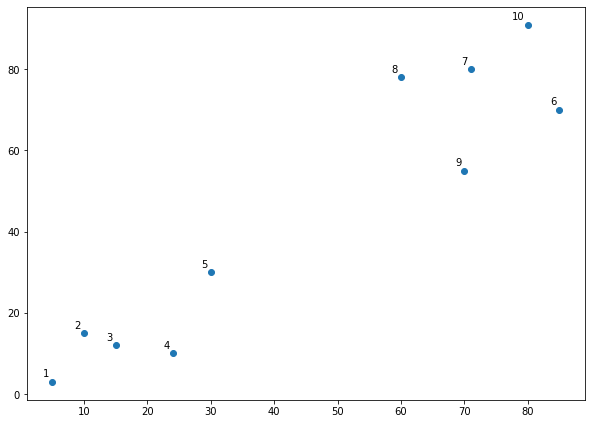

In [11]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

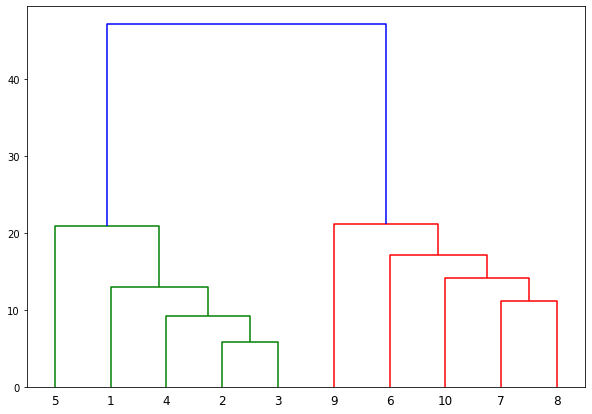

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


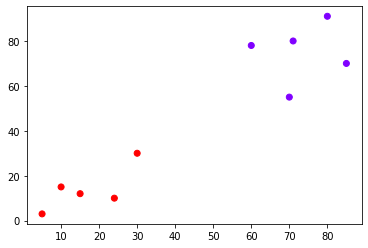

In [15]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [17]:
customer_data = pd.read_csv('D:\Datasets\shopping-data.csv')

FileNotFoundError: [Errno 2] File D:\Datasets\shopping-data.csv does not exist: 'D:\\Datasets\\shopping-data.csv'

In [18]:
customer_data.head()

NameError: name 'customer_data' is not defined

In [19]:
data = customer_data.iloc[:, 3:5].values

NameError: name 'customer_data' is not defined

NameError: name 'data' is not defined

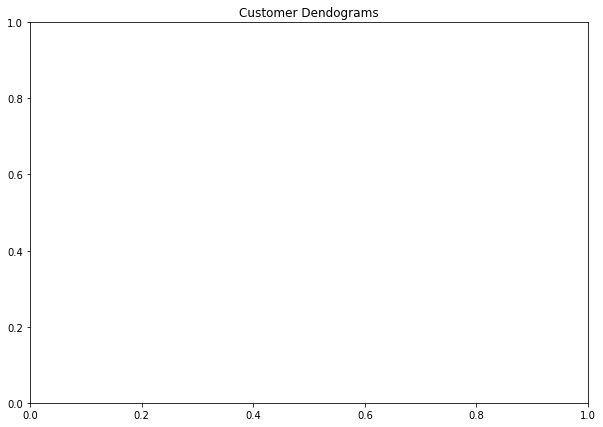

In [20]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

NameError: name 'data' is not defined

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

NameError: name 'data' is not defined

<Figure size 720x504 with 0 Axes>

In [24]:
import math
 
'''
Point class, record the coordinates x, y and the name id of the point
'''
class Point:
    '''
         Initialization function
    '''
    def __init__(self, x, y, name, id):
                 self.x = x # abscissa
                 self.y = y # ordinate
                 self.name = name # name 
                 self.id = id # number 
    '''
         Calculate the Euclidean distance between two points
    '''
    def calc_Euclidean_distance(self, p2):
        return math.sqrt((self.x - p2.x) * (self.x - p2.x) + (self.y - p2.y) * (self.y - p2.y))
 
'''
 1. Get the data set
'''
def get_dataset():
         # The original data set is stored as a tuple, (abscissa, ordinate, number)
    datas = [(0, 2, 'A'), (0, 0, 'B'), (1.5, 0, 'C'), (5, 0, 'D'), (5, 2, 'E')]
         dataset = [] # Used to calculate the distance between two points, in the form [point1, point2...]
         id_point_dict = {} # Number and point mapping
    temp_list = []
         for i in range(len(datas)): # Traverse the original data set
                 point = Point(datas[i][0], datas[i][1], datas[i][2], i) # instantiate with (abscissa, ordinate, number)
        id_point_dict[str(i)] = point
                 dataset.append(point) # Put in the dataset
        temp_list.append(point)
    return dataset, id_point_dict # [p1, p2], {id: point}
 
'''
 2. Calculate the distance between any two points
'''
def get_dist(dataset):
         n = len(dataset) # number of points
         dist = [] # Store the distance between any two points
    for i in range(n):
                 dist_i = [] # Temporary list
                 for j in range(n): # Traverse the data set
                         # Calculate the distance and put it in the temporary list
            dist_i.append(dataset[i].calc_Euclidean_distance(dataset[j]))
                 dist.append(dist_i) # Use a temporary list to create a two-dimensional list
         # Print dist
         print("The distance between any two points:")
    for d in dist:
        print(d)
    print()
    return dist
 
'''
 3. Calculate the dissimilarity of data points in the cluster
'''
def get_dissimilitude(dist, ids):
         n = len(ids) # number of data points in this cluster
         dissimilitudes = {} # Store the dissimilarity of data points
    for id1 in ids:
        id1_num = int(id1)
                 d = 0 # The dissimilarity of point id1, initialized to 0
                 for id2 in ids: # Traverse other data points
            id2_num = int(id2)
                         d += dist[id1_num][id2_num] # add two points of distance
                 dissimilitudes[id1] = d / (n-1) # Calculate dissimilarity
    return dissimilitudes
'''
 4. Find the point of greatest dissimilarity
'''
def get_max_diff(dissimilitudes):
         Max = -1 # Maximum dissimilarity value, initialized to a negative value
         Max_id = -1 # Data point number of maximum dissimilarity value
         for id, diff in dissimilitudes.items(): # Traverse the dissimilitude dictionary obtained before
                 if diff> Max: # If there is a bigger one, update it
            Max = diff
            Max_id = id
         return Max_id # Return the data point number of the maximum dissimilarity value
 
'''
 5. DIANA algorithm main function
'''
def DIANA(dataset, k, id_point_dict):
         dist = get_dist(dataset) # Get the distance between any two points (Euclidean distance)
         res = [] # Result list, store the cluster combination after each operation is completed
         ids = [] # initial cluster
    for i in range(len(dataset)):
                 ids.append(str(i)) # The initial cluster contains the numbers of all data points
         res.append(ids) # Initial clustering result list
 
         while len(res) <k: # When the number of clusters is k, exit the loop
                 t_res = [] # Copy of the result list res, only for traversal
        for t in res:
            t_res.append(t)
                 for ids in t_res: # Traverse the copied result list
            splinter_group = [] # splinter group
            old_party = [] # old party
                         dissimilitudes = get_dissimilitude(dist, ids) # Calculate the dissimilarity of the cluster of ids
                         Max_id = get_max_diff(dissimilitudes) # Get the data point with the largest dissimilarity in this cluster
                         splinter_group.append(Max_id) # put into splinter group
                         for id in ids: # Put the remaining data points into the old party
                old_party.append(id)
                         old_party.remove(Max_id) # Put them all in, and then delete the largest point.
                         pre_len = -1 # Used to determine when the old_party list is no longer increasing, exit the loop
                         while pre_len != len(old_party): # Not equal, the old_party list is still changing
                pre_len = len(old_party) # update pre_len
                change_ids = [] 
                                 # Find the closest distance to the point (point E) in the splinter group in the old party
                                 # The point less than or equal to the closest distance to the point in the old party, find point D,
                                 # Add the point to the splinter group. In this data set,
                                 # Only the distance from point D to point E is 2.3<3.5 (5.3, 5, 3.5),
                                 # So add point D to the splinter group (point D, E);
                                 for id1 in old_party: # Find and traverse in old party
                    Min = float("INF")
                                         flag = True # Determine whether the point meets the requirements
                                         for id2 in splinter_group: # If there are multiple points in splinter_group, you need to find the closest distance
                        if dist[int(id1)][int(id2)] < Min:
                            Min = dist[int(id1)][int(id2)]
                                         for id3 in old_party: # Find the point whose closest distance is less than or equal to the closest distance to the point in the old party
                                                 if (Min> dist[int(id1)][int(id3)]) and (id1 != id3): # If the requirements are not met, set to False and exit the loop
                            flag = False
                            break
                                         if flag: # This point meets the requirements
                                                 change_ids.append(id1) # Put it in the change_ids list, indicating the data points that need to be changed
                                 for id in change_ids: # Traverse
                                         old_party.remove(id) # Remove from old_party
                                         splinter_group.append(id) # put into splinter_group
                         if len(splinter_group) != 0 and len(old_party) != 0: # The current cluster has changed, update the result list res
                                 res.remove(ids) # delete old cluster
                                 res.append(splinter_group) # Add two new clusters
                res.append(old_party)
                         # Print the results to see
            print("-------------------------")
                         print("Final clustering result:")
            for r in res:
                for id in r:
                                           # We used the number of the data point before, use id_point_dict to find the point, and print his name
                    print(id_point_dict[id].name, end="")
                print()
 
 # Test
dataset, id_point_dict = get_dataset()
k = 2
DIANA(dataset, k, id_point_dict)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 32)